In [3]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [20]:
f = "../data/test/yeast/analysis/analysis.yeast.core.pansn.sim.txt"

In [21]:
df = pd.read_csv(f, sep = "\t", index_col = 0)

In [22]:
df

,Sequence[bp],#Node
Feature,,
ABQ_6.ChrX,47050,336
BIH_4.ChrX,26389,278
ABF_6.ChrX,33120,2181
BPN_2.ChrX,104353,1250
BCK_8.ChrX,53334,3275
0,0,0
1,264241,7315
2,10804,2191
3,13800,2240


In [23]:
split_index = [i for i, x in enumerate(df.index) if x == "1"][0]
split_index

6

In [24]:
df_seq = df.iloc[split_index+1:, :]
df_seq

,Sequence[bp],#Node
Feature,,
2,10804,2191
3,13800,2240
4,73893,6833
5,597805,7655


In [25]:
df_seq2 = df.iloc[:split_index-1, :]
df_seq2 = df_seq2.sort_values("Sequence[bp]")
df_seq2

,Sequence[bp],#Node
Feature,,
BIH_4.ChrX,26389,278
ABF_6.ChrX,33120,2181
ABQ_6.ChrX,47050,336
BCK_8.ChrX,53334,3275
BPN_2.ChrX,104353,1250


/tmp/ipykernel_98255/419431135.py:2: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar([int(x) for x in df_seq.index][-1], df_seq["Sequence[bp]"][-1], edgecolor = "black")


Text(0.5, 0, 'Similarity (Number of samples)')

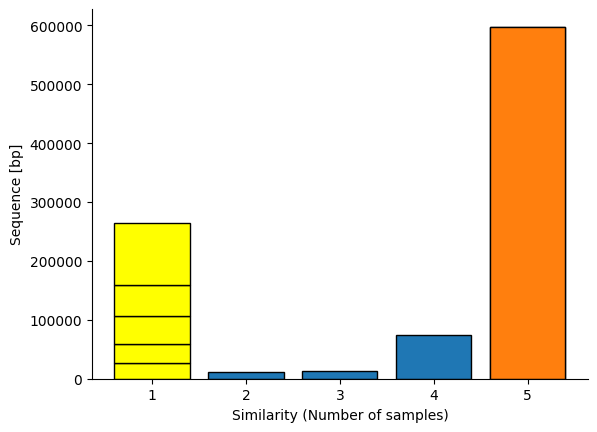

In [26]:
plt.bar([int(x) for x in df_seq.index], df_seq["Sequence[bp]"], edgecolor = "black")
plt.bar([int(x) for x in df_seq.index][-1], df_seq["Sequence[bp]"][-1], edgecolor = "black")

bottom1 = 0
for x in df_seq2.iterrows():
    plt.bar(1, (x[1]["Sequence[bp]"]), color = "yellow", bottom = bottom1, edgecolor = "black")
    bottom1 += int(x[1]["Sequence[bp]"])
plt.ylabel("Sequence [bp]")
plt.xlabel("Similarity (Number of samples)")
#plt.savefig("plots/pancore.png", dpi = 400)
#plt.savefig("plots/pancore.pdf")

In [27]:
new_rc_params = {'text.usetex': False,
"svg.fonttype": 'none'
}

plt.rcParams.update(new_rc_params)
import matplotlib as mpl
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False

In [28]:
df_seq["Sequence[bp]"]/1000

Feature
2     10.804
3     13.800
4     73.893
5    597.805
Name: Sequence[bp], dtype: float64

/tmp/ipykernel_98255/4164575570.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.bar([int(x) for x in df_seq.index][-1], df_seq["Sequence[bp]"][-1]/1000, edgecolor = "black")


Text(0.5, 0, 'Similarity')

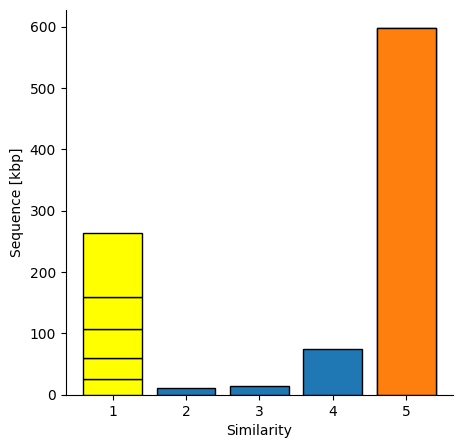

In [29]:
plt.figure(figsize=(5,5))

plt.bar([int(x) for x in df_seq.index], df_seq["Sequence[bp]"]/1000, edgecolor = "black")
plt.bar([int(x) for x in df_seq.index][-1], df_seq["Sequence[bp]"][-1]/1000, edgecolor = "black")

bottom1 = 0
for x in df_seq2.iterrows():
    plt.bar(1, (x[1]["Sequence[bp]"])/1000, color = "yellow", bottom = bottom1, edgecolor = "black")
    bottom1 += int(x[1]["Sequence[bp]"])/1000
plt.ylabel("Sequence [kbp]")
plt.xlabel("Similarity")
#plt.xticks(np.arange(min(x), max(x)+1, 1.0))
#plt.savefig("plots/pancore.png", dpi = 400)
#plt.savefig("plots/pancore.pdf")